In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

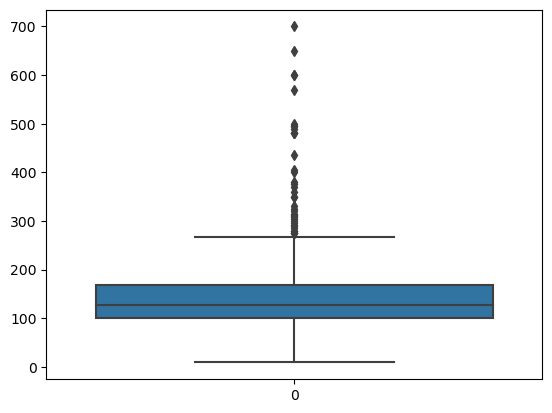

In [5]:
sns.boxplot(data['LoanAmount'])

In [6]:
data["LoanAmount"].skew()

2.677551679256059

# np.where() 

In [8]:
arr = np.random.randint(5, 50, 15)
arr

array([ 9, 22, 11, 36, 21, 21, 26, 47, 46, 16,  8, 27, 24, 10, 45])

In [9]:
# Replace all values greater than 25 with 250
## arr > 25
# value 26 should be replaced with 250
# arr

In [10]:
np.where(arr> 25, 250, arr)

array([  9,  22,  11, 250,  21,  21, 250, 250, 250,  16,   8, 250,  24,
        10, 250])

In [11]:
# Find the outlier in the Loan Amount column and replace the outliers with some value

# value of LoanAmt > 90% value
# 90%
# loanAmt column

In [12]:
data['LoanAmount'].quantile(0.9)

235.79999999999995

In [14]:
data['LoanAmount'].quantile(0.1)

71.0

In [15]:
data['LoanAmount'] = np.where(data['LoanAmount'] > 235, 235, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] < 71, 71, data['LoanAmount'])

<Axes: >

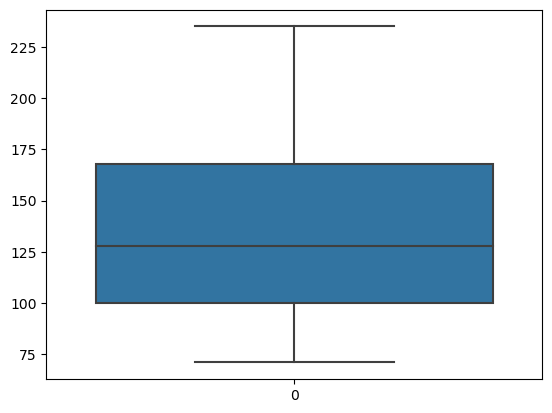

In [16]:
sns.boxplot(data['LoanAmount'])

In [17]:
data['LoanAmount'].skew()

0.6231463951818582

# Method 2: Outlier Trimming

<Axes: >

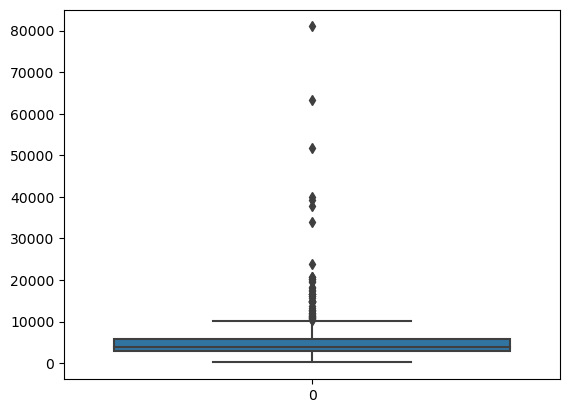

In [18]:
sns.boxplot(data['ApplicantIncome'])

In [20]:
data['ApplicantIncome'].skew()

6.539513113994625

# Idea for trimming the outliers

- Find out the 75% value and 25% value
- Find the index of the rows where the values are >75% value and <25% value
- Drop the value at the row indices obtained from previous step

In [21]:
# Find out the 75% and the 25% value

data['ApplicantIncome'].quantile(0.75), data['ApplicantIncome'].quantile(0.25)

(5795.0, 2877.5)

In [23]:
# Find the indices from the ApplicantIncome col where the value are > 75% or <25%

x = data[(data['ApplicantIncome'] < 2877.5) | (data['ApplicantIncome'] > 5795)].index
x

Int64Index([  0,   3,   4,   6,   9,  11,  13,  14,  19,  20,
            ...
            591, 592, 594, 596, 598, 600, 604, 605, 611, 612],
           dtype='int64', length=308)

In [24]:
data['ApplicantIncome'] = data['ApplicantIncome'].drop(x)

In [25]:
data["ApplicantIncome"].skew()

0.5775597717250637

<Axes: >

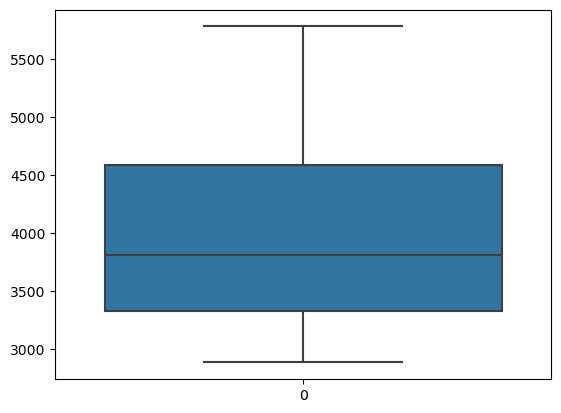

In [26]:
sns.boxplot(data['ApplicantIncome'])

# Method 3: Log Transformation Method

In [35]:
data = pd.read_csv("loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data['LoanAmount'].skew()

2.677551679256059

<Axes: >

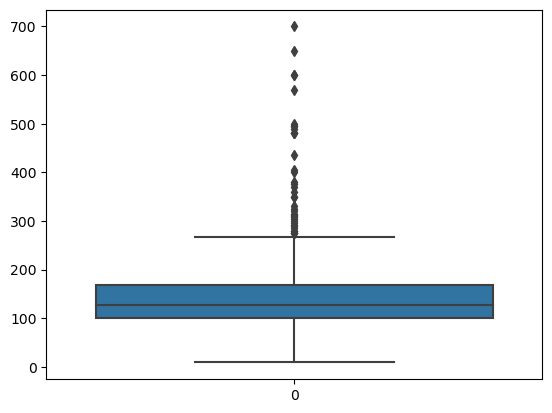

In [37]:
sns.boxplot(data["LoanAmount"])

In [38]:
np.log(128)

4.852030263919617

In [39]:
np.log(66)

4.189654742026425

In [40]:
data["LoanAmount"] = np.log(data["LoanAmount"])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y


<Axes: >

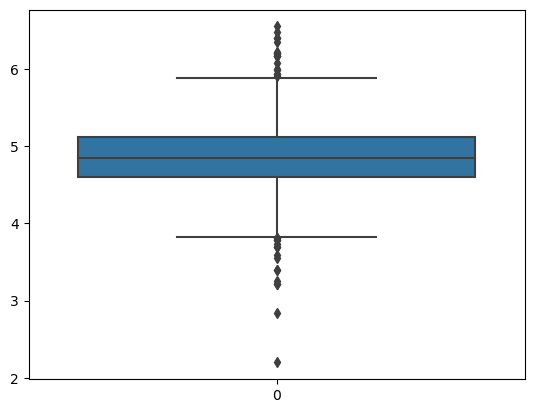

In [41]:
sns.boxplot(data["LoanAmount"])

# Conclusion: It just means that on the LoanAmount the log transformation method does not fit well

# Load the tips dataset

In [63]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

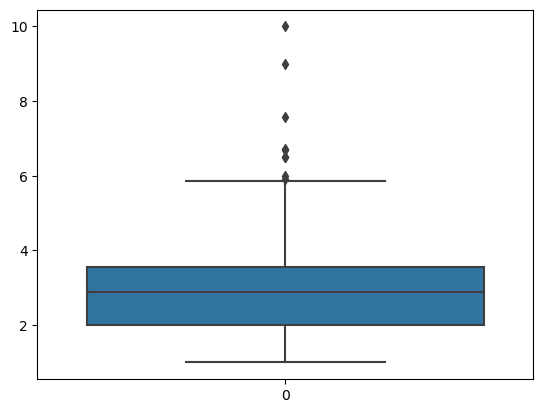

In [58]:
sns.boxplot(tips['tip'])

# Method 4: Replace the outliers with the median of the column

- Find out value >85% and <15%
- use np.where() to replace all outliers obtained at previous step with the median of the column

In [64]:
tips['tip'].quantile(0.75), tips['tip'].quantile(0.25)

(3.5625, 2.0)

In [60]:
tips['tip'].median()

2.9

In [65]:
tips['tip'] = np.where(tips['tip'] > 3.56, 2.9, tips['tip'])
tips['tip'] = np.where(tips['tip'] < 2, 2.9, tips['tip'])

<Axes: >

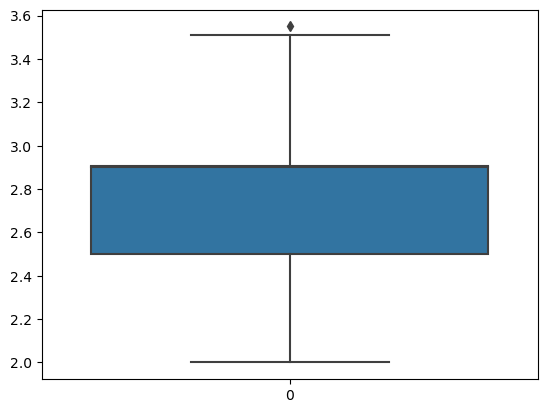

In [66]:
sns.boxplot(tips['tip'])

# Method 5 : IQR Method

In [67]:
data = pd.read_csv("loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

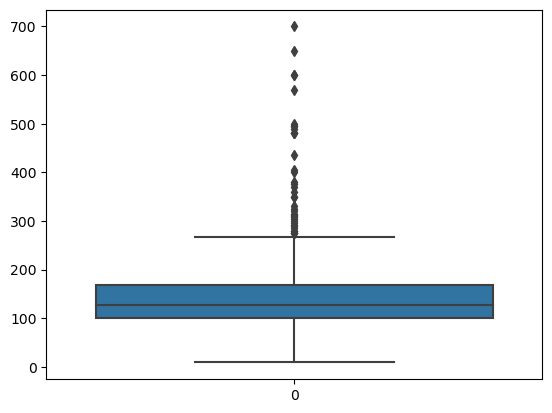

In [68]:
sns.boxplot(data['LoanAmount'])

# Idea for IQR Method

Step 1:
- Cal Q1 - 25%
- Cal Q3 - 75%
- Cal IQR = Q3 - Q1  
Step 2:  
- Find the upper whisker and the lower Whisker of the column
- UW = Q3 + 1.5 * IQR
- LW = Q1 - 1.5 * IQR  
Step 3: 
- Any value '>UW' or '<LW' then replace with the IQR value

In [72]:
q3, q1 = data['LoanAmount'].quantile(0.75), data['LoanAmount'].quantile(0.25)

In [73]:
q3

168.0

In [74]:
q1

100.0

In [71]:
iqr = data['LoanAmount'].quantile(0.75) - data['LoanAmount'].quantile(0.25)
iqr

68.0

In [75]:
uw = q3 + 1.5 * iqr
uw

270.0

In [77]:
lw = q1 - 1.5 * iqr
lw

-2.0

In [78]:
data['LoanAmount'] = np.where(data['LoanAmount'] > uw, q3, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] < lw, q1, data['LoanAmount'])

<Axes: >

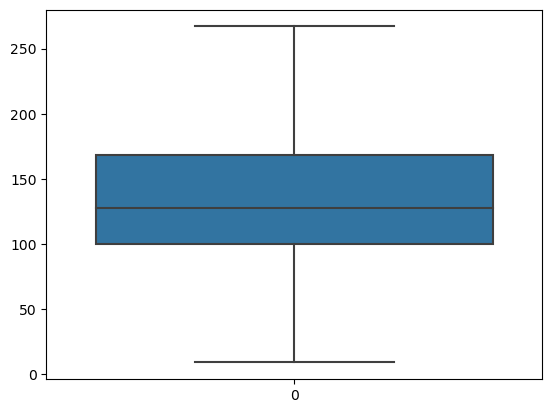

In [79]:
sns.boxplot(data['LoanAmount'])

In [ ]:
# load the data
# missing value drop
# outliers drop
# split
# apply ml
# check accuracy and note accuracy

In [80]:
# load the data
# missing value median treatment
# outliers median treatment
# split
# apply ml
# check accuracy and note accuracy

#  if there is a difference between the above then plan as per the problem statement